Exercicios

Implementação de Algoritmos:

1 - No Oceaudio, gere e salve para arquivo dois sinais senodais com 1s de duração, Fs = 8K e atenuação de -12 dB, quantizado em 16 bits.

Obs.: Amp dB = 20.log Amp desejada
                      ------------
                        32768

x1 = 200 Hz
x2 = 2K Hz


In [45]:
import numpy as np
import matplotlib.pyplot as plt

def impulso_unitario(n, n0=0):
    return np.where(n == n0, 1, 0)

# Definindo parâmetros e gerando exemplos de sinais:
# Nesta parte, definimos um array n que contém amostras no intervalo de -10 a 10. 
# Em seguida, geramos exemplos dos sinais discretos básicos para este intervalo, 
# usando as funções que definimos anteriormente.

n = np.arange(-10, 11)  # Amostras no intervalo de -10 a 10

# Exemplos das funções

impulso = impulso_unitario(n, n0=0)
print(impulso)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


Text(0.5, 1.0, 'Entrada 200 Hz')

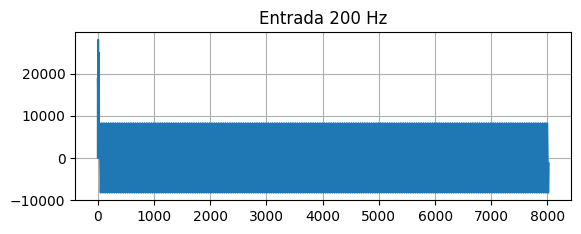

In [17]:
# Lendo o arquivo de entrada
with open('/workspaces/UNIVALI/21814_PDS/Aula_05/Sin_200Hz.pcm', 'rb') as fid:
    entrada1 = np.fromfile(fid, dtype=np.int16)

plt.subplot(2, 1, 1)
plt.plot(entrada1)
plt.grid()
plt.title('Entrada 200 Hz')

Text(0.5, 1.0, 'Entrada 2k Hz')

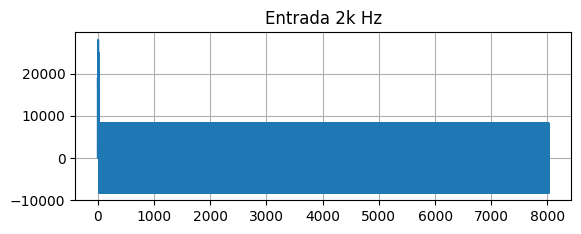

In [12]:
# Lendo o arquivo de entrada
with open('/workspaces/UNIVALI/21814_PDS/Aula_05/Sin_2K.pcm', 'rb') as fid:
    entrada2 = np.fromfile(fid, dtype=np.int16)

plt.subplot(2, 1, 1)
plt.plot(entrada2)
plt.grid()
plt.title('Entrada 2k Hz')

In [22]:
# Definindo a entrada
tama_loop = len(entrada1)
saida = np.zeros(tama_loop)

saida2 = np.zeros(tama_loop)


In [23]:
for j in range(tama_loop):
    saida[j] = entrada1[j] + entrada2[j]


for j in range(tama_loop):
    saida2[j] = entrada1[j] + entrada2[j]


/tmp/ipykernel_7843/4136008178.py:2: RuntimeWarning: overflow encountered in scalar add
  saida[j] = entrada1[j] + entrada2[j]
/tmp/ipykernel_7843/4136008178.py:6: RuntimeWarning: overflow encountered in scalar add
  saida2[j] = entrada1[j] + entrada2[j]


Text(0.5, 1.0, 'Saida 2k + 200 Hz')

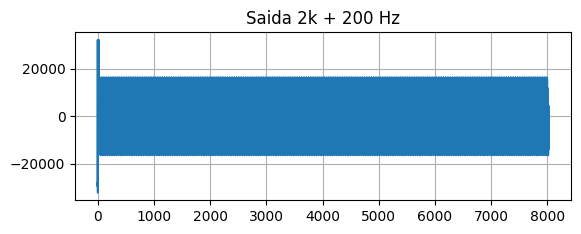

In [20]:
plt.subplot(2, 1, 1)
plt.plot(saida)
plt.grid()
plt.title('Saida 2k + 200 Hz')

Text(0.5, 1.0, 'Saida 2k x 200 Hz')

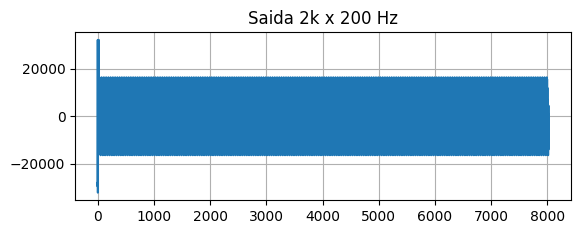

In [24]:
plt.subplot(2, 1, 1)
plt.plot(saida2)
plt.grid()
plt.title('Saida 2k x 200 Hz')

In [21]:
# Salvar arquivo de saída
with open('saida_soma.pcm', 'wb') as fid2:
    saida.astype(np.int16).tofile(fid2)

In [25]:
# Salvar arquivo de saída
with open('saida_mult.pcm', 'wb') as fid3:
    saida2.astype(np.int16).tofile(fid3)

2 - Implementar o algoritmo do eco

In [41]:
# Exemplo delay
Fs = 8000               # 8 kHz
t1 = 1.0 * 10 ** -3     # 1 ms
d1 = int(t1 * Fs)

print(d1)

8


In [27]:
# Definição dos ganhos
a = 0.9
b = 0.5

In [44]:
# Definindo y[n]
y = np.zeros(np.size(impulso))

print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
tama_delay = n1
vetor_delay = np.zeros((tama_delay, 1))

In [38]:
# Definindo a entrada
entrada = np.zeros((4 * tama_delay, 1))
entrada[0, 0] = 1  # Definindo o impulso unitário
tama_loop = len(entrada)
vet_saida = np.zeros((tama_loop, 1))

In [39]:
for j in range(tama_loop):
    input = entrada[j, 0]
    vetor_delay[0, 0] = input
    y = a * vetor_delay[0, 0] + b * vetor_delay[n1 - 1, 0]
    # Desloca o vetor de delay
    #for k in range(tama_delay - 1, 0, -1):
    #    vetor_delay[k, 0] = vetor_delay[k - 1, 0]
    # Desloca o vetor de saida
    for k in range(tama_delay - 1, 0, -1):
        vet_saida[k, 0] = vet_saida[k - 1, 0]
    vet_saida[j, 0] = y

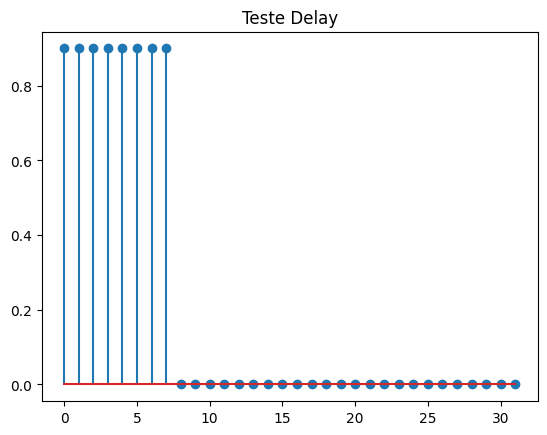

In [40]:
plt.stem(vet_saida)
plt.title('Teste Eco')
plt.show()

3 - Filtro de ruido branco

4 - Avaliar a Energia_Potencia de um Sinal

P[n] = 1    Sum - x[n] elevado 2
      ---
       N

N = Frame = 16
Th = A definir... (threshold - limite)

P calc >= Pth